In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tikzplotlib

import seaborn as sns

In [2]:
# eval_file = '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-24/eval.csv'
eval_file = '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-26T22:06:49.660075/eval.csv'
df = pd.read_csv(eval_file, sep=',')

In [3]:
print(df)

    Generation  Stage  Particle       A3        S3        A2        S2
0            0      0         0  6.08630  0.584980  10.16380  0.969174
1            0      0         1  5.19631  0.550707   8.80459  0.960709
2            0      0         2  6.08734  0.585089  10.17960  0.969378
3            0      0         3  4.13488  0.458334   7.15109  0.954317
4            0      0         4  5.49378  0.521139   9.50272  0.966885
..         ...    ...       ...      ...       ...       ...       ...
60           3      2         0  3.14953  0.484840   6.60395  0.957696
61           3      2         1  4.08145  0.548951   8.04217  0.963758
62           3      2         2  3.95454  0.547326   7.72270  0.963510
63           3      2         3  4.23003  0.548714   8.30250  0.964019
64           3      2         4  3.00099  0.475821   5.86835  0.955791

[65 rows x 7 columns]


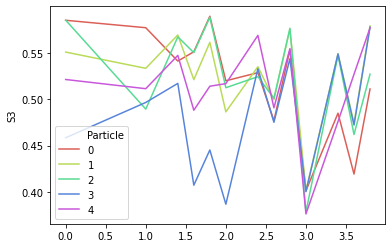

In [4]:
sns.lineplot(
    x=df["Generation"] + 0.2*df["Stage"],
    y="S3",
    hue="Particle",
    palette=sns.color_palette("hls", len(np.unique(df["Particle"].values))),
    markers=True,
    data=df
)

In [5]:
# plt.figure()
# sns.swarmplot(
#     x=df["Generation"],
#     y="S3",
#     hue="Stage",
#     hue_order=[0, 2],
#     palette=sns.color_palette("hls", len(np.unique(df["Stage"].values))),
#     dodge=True,
#     data=df
# )
# plt.figure()
# sns.swarmplot(
#     x=df["Generation"],
#     y="A3",
#     hue="Stage",
#     hue_order=[0, 2],
#     palette=sns.color_palette("hls", len(np.unique(df["Stage"].values))),
#     dodge=True,
#     data=df
# )

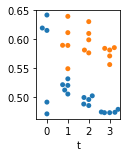

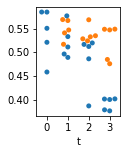

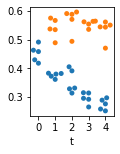

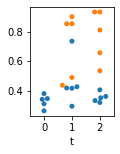

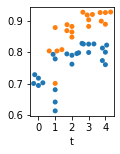

In [14]:
eval_files = ['/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-24/eval.csv',
              '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-26T22:06:49.660075/eval.csv',
              '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-31/eval.csv',
              '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-30/eval.csv',
              '/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-29/eval.csv']
# eval_files = ['/home/pricear/mps_ws/src/mps_voxels/mps_test_data/2020-06-30/eval.csv']
for i, eval_file in enumerate(eval_files):
    df = pd.read_csv(eval_file, sep=',')
#     plt.figure(figsize=(2, 2))
    plt.figure(figsize=(1.5, 2))
    
    is2D = i >= 3
    if is2D:
        yCol = 'S2'
    else:
        yCol = 'S3'
    
    ax = sns.swarmplot(
        x=df["Generation"],
        y=yCol,
        hue="Stage",
        hue_order=[0, 2],
#         palette=sns.color_palette("hls", len(np.unique(df["Stage"].values))),
        dodge=False,
        data=df
    )
    
    
    ax.set(xlabel='t')
    if i == 0:
        ax.set(ylabel='') # 'Coverage'
    else:
        ax.set(ylabel='')
    
    if i < 5: #4
        ax.get_legend().remove()
    else:
        new_labels = ['Single Frame', 'Filtered']
        for t, l in zip(ax.legend_.texts, new_labels): t.set_text(l)
            
#     plt.tight_layout()
    
#     tikzplotlib.clean_figure()
#     tikzplotlib.save('experiment_' + str(i) + '.tex', axis_height='4cm', axis_width='3.75cm', strict=False, textsize=8)
    plt.savefig('experiment_' + str(i) + '.png', bbox_inches='tight', dpi=600)